In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(columns=["math_score"],axis=1)
y=df["math_score"]

In [7]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder",oh_transformer,cat_features),
     ("StandardScaler",numeric_transformer,num_features)
     ]
                                 )

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2score=r2_score(true,predicted)
    return mae,mse,r2score

In [11]:
models={
    "Linear regression" : LinearRegression(),
    "Ridge" : Ridge() ,
    "Lasso" : Lasso(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision tree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "CatBoostregressor" : CatBoostRegressor(verbose=False),
    "AdaBoostregressor" : AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_mae,model_train_mse,model_train_r2score=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_r2score=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for train dataset")
    print("MSE={}".format(model_train_mse))
    print("MAE={}".format(model_train_mae))
    print("R2 Score = {}".format(model_train_r2score))
    print("Model performance for Test dataset")
    print("MSE={}".format(model_test_mse))
    print("MAE={}".format(model_test_mae))
    print("R2 Score = {}".format(model_test_r2score))
    r2_list.append(model_test_r2score)
    

    

Linear regression
Model performance for train dataset
MSE=28.060804235684667
MAE=4.238267465725306
R2 Score = 0.8742732380399839
Model performance for Test dataset
MSE=30.058114626720368
MAE=4.337930600167406
R2 Score = 0.8778243107659013
Ridge
Model performance for train dataset
MSE=28.06418045343843
MAE=4.236822709293622
R2 Score = 0.8742581108568038
Model performance for Test dataset
MSE=30.01731559123236
MAE=4.3353724193882295
R2 Score = 0.8779901445296865
Lasso
Model performance for train dataset
MSE=42.92226969117584
MAE=5.1837328384070265
R2 Score = 0.8076862680441843
Model performance for Test dataset
MSE=44.27752059355697
MAE=5.2217100046729215
R2 Score = 0.8200274147838306
K-Neighbors Regressor
Model performance for train dataset
MSE=33.54746666666667
MAE=4.586399999999999
R2 Score = 0.8496901827711046
Model performance for Test dataset
MSE=50.876
MAE=5.5208
R2 Score = 0.793206911256223
Decision tree
Model performance for train dataset
MSE=0.08333333333333333
MAE=0.02
R2 Scor

In [12]:

model_list

['Linear regression',
 'Ridge',
 'Lasso',
 'K-Neighbors Regressor',
 'Decision tree',
 'RandomForest',
 'CatBoostregressor',
 'AdaBoostregressor']

In [13]:
r2_list

[0.8778243107659013,
 0.8779901445296865,
 0.8200274147838306,
 0.793206911256223,
 0.7690466368735474,
 0.8495250302592352,
 0.8548295164541377,
 0.842249700735138]

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
1,Ridge,0.877990
0,Linear regression,0.877824
6,CatBoostregressor,0.854830
5,RandomForest,0.849525
7,AdaBoostregressor,0.842250
2,Lasso,0.820027
3,K-Neighbors Regressor,0.793207
4,Decision tree,0.769047


In [15]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)
print("Accuracy = ",score*100)

Accuracy =  87.78243107659013


<Axes: xlabel='math_score'>

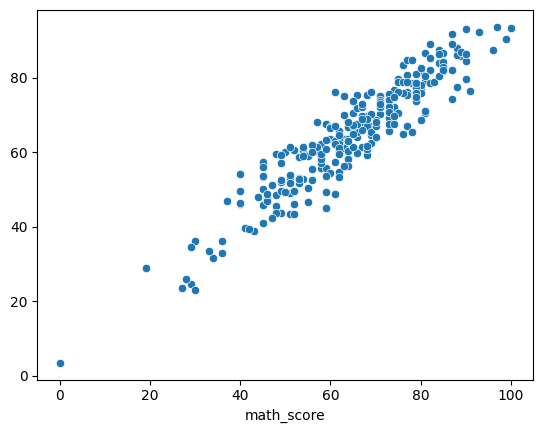

In [16]:
sns.scatterplot(x=y_test,y=y_pred)

In [17]:
pred_df = pd.DataFrame({
    "Actual value": y_test,
    "Predicted Value": y_pred,
    "Difference": y_test - y_pred
})
pred_df.head()

,Actual value,Predicted Value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
